In [1]:
#RFM---Recency,Frequency and Monetary
#transaction details

In [2]:
import pandas  as pd
retail_df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

In [3]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom

In [4]:
#Group the customers not the transactions
# Missing Values
retail_df.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [5]:
#Recency--- How recent the customer is
#Frequency --- how frequent purchases customer is doing
#Monetory --- how much money the customer spends

In [6]:
missing_cust_inv = retail_df[retail_df.CustomerID.isnull()]['InvoiceNo'].unique()

In [7]:
retail_df.shape

(541909, 8)

In [8]:
retail_df[retail_df.InvoiceNo.isin(missing_cust_inv)].isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
retail_df[retail_df.InvoiceNo.isin(missing_cust_inv)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135080 entries, 622 to 541540
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    135080 non-null  object 
 1   StockCode    135080 non-null  object 
 2   Description  133626 non-null  object 
 3   Quantity     135080 non-null  int64  
 4   InvoiceDate  135080 non-null  object 
 5   UnitPrice    135080 non-null  float64
 6   CustomerID   0 non-null       float64
 7   Country      135080 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 9.3+ MB


In [10]:
retail_df.dropna(subset=['CustomerID'], inplace=True)

In [11]:
retail_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID         Country  
0       01-12-2010 08:26       2.55     17850.0  United Kingdom  
1       01-12-2010 08:26       3.39     17850.0  United Kingdom  
2       01-12-2010 08:26       2.75     17850.0  United Kingdom  
3       01-12-2010 08:26       3.39     17850.0  United Kingdom  
4       01-12-2010 08:26       3.39     17850.0  United Kingdom  
...                  ...        ...         ...             ...  
541904  09-12-2011 12:50       0.85     12680.0          France  
541905  09-12-2011 12:50       2.10     12680.0          France  
541906  09-12-2011 12:50       4.15     12680.0          France  
541907  09-12-2011 12:50       4.15     12680.0          France  
541908  09-12-2011 12:50       4.95     12680.0          France  

[406829 rows x 8 columns]

In [12]:
retail_df.drop(['Description'], axis =1, inplace=True)

In [13]:
#Monetry
retail_df['Amount'] = retail_df.Quantity * retail_df.UnitPrice

In [14]:
retail_df

InvoiceNo StockCode  Quantity       InvoiceDate  UnitPrice  CustomerID  \
0         536365    85123A         6  01-12-2010 08:26       2.55     17850.0   
1         536365     71053         6  01-12-2010 08:26       3.39     17850.0   
2         536365    84406B         8  01-12-2010 08:26       2.75     17850.0   
3         536365    84029G         6  01-12-2010 08:26       3.39     17850.0   
4         536365    84029E         6  01-12-2010 08:26       3.39     17850.0   
...          ...       ...       ...               ...        ...         ...   
541904    581587     22613        12  09-12-2011 12:50       0.85     12680.0   
541905    581587     22899         6  09-12-2011 12:50       2.10     12680.0   
541906    581587     23254         4  09-12-2011 12:50       4.15     12680.0   
541907    581587     23255         4  09-12-2011 12:50       4.15     12680.0   
541908    581587     22138         3  09-12-2011 12:50       4.95     12680.0   

               Country  Amount  
0       United Kingdom   15.30  
1       United Kingdom   20.34  
2       United Kingdom   22.00  
3       United Kingdom   20.34  
4       United Kingdom   20.34  
...                ...     ...  
541904          France   10.20  
541905          France   12.60  
541906          France   16.60  
541907          France   16.60  
541908          France   14.85  

[406829 rows x 8 columns]

In [15]:
rfm_m = retail_df.groupby('CustomerID').sum()['Amount'].reset_index()

In [16]:
rfm_m

CustomerID   Amount
0        12346.0     0.00
1        12347.0  4310.00
2        12348.0  1797.24
3        12349.0  1757.55
4        12350.0   334.40
...          ...      ...
4367     18280.0   180.60
4368     18281.0    80.82
4369     18282.0   176.60
4370     18283.0  2094.88
4371     18287.0  1837.28

[4372 rows x 2 columns]

In [17]:
retail_df[retail_df.CustomerID==12346]

InvoiceNo StockCode  Quantity       InvoiceDate  UnitPrice  CustomerID  \
61619    541431     23166     74215  18-01-2011 10:01       1.04     12346.0   
61624   C541433     23166    -74215  18-01-2011 10:17       1.04     12346.0   

              Country   Amount  
61619  United Kingdom  77183.6  
61624  United Kingdom -77183.6

In [18]:
rfm_m.sort_values(by='Amount')

CustomerID     Amount
3756     17448.0   -4287.63
2236     15369.0   -1592.49
1384     14213.0   -1192.20
3870     17603.0   -1165.30
125      12503.0   -1126.00
...          ...        ...
55       12415.0  123725.45
1895     14911.0  132572.62
3758     17450.0  187482.17
4233     18102.0  256438.49
1703     14646.0  279489.02

[4372 rows x 2 columns]

In [19]:
rfm_f = retail_df.drop_duplicates(subset='InvoiceNo').groupby('CustomerID').count()['InvoiceNo'].reset_index()

In [20]:
rfm_f

CustomerID  InvoiceNo
0        12346.0          2
1        12347.0          7
2        12348.0          4
3        12349.0          1
4        12350.0          1
...          ...        ...
4367     18280.0          1
4368     18281.0          1
4369     18282.0          3
4370     18283.0         16
4371     18287.0          3

[4372 rows x 2 columns]

In [21]:
rfm_mf = pd.merge(rfm_m, rfm_f,  on='CustomerID')

In [22]:
rfm_mf
#task for you --- Calculate the recency

CustomerID   Amount  InvoiceNo
0        12346.0     0.00          2
1        12347.0  4310.00          7
2        12348.0  1797.24          4
3        12349.0  1757.55          1
4        12350.0   334.40          1
...          ...      ...        ...
4367     18280.0   180.60          1
4368     18281.0    80.82          1
4369     18282.0   176.60          3
4370     18283.0  2094.88         16
4371     18287.0  1837.28          3

[4372 rows x 3 columns]

In [33]:
rfm_mf.rename({'Amount':'Monetry', 'InvoiceNo':'Frequency'}, axis=1, inplace=True)

In [34]:
rfm_mf

CustomerID  Monetry  Frequency
0        12346.0     0.00          2
1        12347.0  4310.00          7
2        12348.0  1797.24          4
3        12349.0  1757.55          1
4        12350.0   334.40          1
...          ...      ...        ...
4367     18280.0   180.60          1
4368     18281.0    80.82          1
4369     18282.0   176.60          3
4370     18283.0  2094.88         16
4371     18287.0  1837.28          3

[4372 rows x 3 columns]

In [35]:
rfm_mf.sort_values(by='Monetry')

CustomerID    Monetry  Frequency
3756     17448.0   -4287.63          1
2236     15369.0   -1592.49          1
1384     14213.0   -1192.20          1
3870     17603.0   -1165.30          5
125      12503.0   -1126.00          1
...          ...        ...        ...
55       12415.0  123725.45         26
1895     14911.0  132572.62        248
3758     17450.0  187482.17         55
4233     18102.0  256438.49         62
1703     14646.0  279489.02         77

[4372 rows x 3 columns]

In [36]:
retail_df[retail_df.CustomerID==17603.0]

InvoiceNo StockCode  Quantity       InvoiceDate  UnitPrice  CustomerID  \
122282   C546859         M      -102  17-03-2011 14:39       5.45     17603.0   
269176   C560435         M        -1  18-07-2011 16:01     294.92     17603.0   
269177   C560436         M        -1  18-07-2011 16:04     705.45     17603.0   
354250    567868     84949         6  22-09-2011 14:18       1.65     17603.0   
354251    567868     22655         2  22-09-2011 14:18     125.00     17603.0   
354252    567868     23396         4  22-09-2011 14:18       3.75     17603.0   
354253    567868     23395         4  22-09-2011 14:18       3.75     17603.0   
354254    567868     23513         6  22-09-2011 14:18       2.08     17603.0   
354255    567868     23511         6  22-09-2011 14:18       2.08     17603.0   
354256    567868     23515         6  22-09-2011 14:18       2.08     17603.0   
354257    567868     23514         6  22-09-2011 14:18       2.08     17603.0   
354258    567868     22077        12  22-09-2011 14:18       1.95     17603.0   
354259    567868     22082        10  22-09-2011 14:18       1.65     17603.0   
354260    567868     84946        12  22-09-2011 14:18       1.25     17603.0   
410580   C572117     23395        -1  20-10-2011 19:19       3.75     17603.0   

               Country  Amount  
122282  United Kingdom -555.90  
269176  United Kingdom -294.92  
269177  United Kingdom -705.45  
354250  United Kingdom    9.90  
354251  United Kingdom  250.00  
354252  United Kingdom   15.00  
354253  United Kingdom   15.00  
354254  United Kingdom   12.48  
354255  United Kingdom   12.48  
354256  United Kingdom   12.48  
354257  United Kingdom   12.48  
354258  United Kingdom   23.40  
354259  United Kingdom   16.50  
354260  United Kingdom   15.00  
410580  United Kingdom   -3.75

In [37]:
min(retail_df.InvoiceDate)

'01-02-2011 08:23'

In [38]:
max(retail_df.InvoiceDate)

'31-10-2011 17:13'

In [39]:
# here dates are in string format, we need to convert it to date format
retail_df['InvoiceDate'] = pd.to_datetime(retail_df.InvoiceDate, errors='ignore')

In [40]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Quantity     406829 non-null  int64         
 3   InvoiceDate  406829 non-null  datetime64[ns]
 4   UnitPrice    406829 non-null  float64       
 5   CustomerID   406829 non-null  float64       
 6   Country      406829 non-null  object        
 7   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 27.9+ MB


In [42]:
max_date = max(retail_df.InvoiceDate)

In [43]:
retail_df['diff'] = max_date - retail_df.InvoiceDate

In [47]:
retail_df

InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  \
0         536365    85123A         6 2010-01-12 08:26:00       2.55   
1         536365     71053         6 2010-01-12 08:26:00       3.39   
2         536365    84406B         8 2010-01-12 08:26:00       2.75   
3         536365    84029G         6 2010-01-12 08:26:00       3.39   
4         536365    84029E         6 2010-01-12 08:26:00       3.39   
...          ...       ...       ...                 ...        ...   
541904    581587     22613        12 2011-09-12 12:50:00       0.85   
541905    581587     22899         6 2011-09-12 12:50:00       2.10   
541906    581587     23254         4 2011-09-12 12:50:00       4.15   
541907    581587     23255         4 2011-09-12 12:50:00       4.15   
541908    581587     22138         3 2011-09-12 12:50:00       4.95   

        CustomerID         Country  Amount              diff  
0          17850.0  United Kingdom   15.30 697 days 08:53:00  
1          17850.0  United Kingdom   20.34 697 days 08:53:00  
2          17850.0  United Kingdom   22.00 697 days 08:53:00  
3          17850.0  United Kingdom   20.34 697 days 08:53:00  
4          17850.0  United Kingdom   20.34 697 days 08:53:00  
...            ...             ...     ...               ...  
541904     12680.0          France   10.20  89 days 04:29:00  
541905     12680.0          France   12.60  89 days 04:29:00  
541906     12680.0          France   16.60  89 days 04:29:00  
541907     12680.0          France   16.60  89 days 04:29:00  
541908     12680.0          France   14.85  89 days 04:29:00  

[406829 rows x 9 columns]

In [44]:
rfm_r = retail_df.groupby('CustomerID').min()['diff'].dt.days.reset_index()

In [45]:
rfm_r.rename({'diff':'recency'}, axis=1, inplace=True)

In [46]:
rfm_r

CustomerID  recency
0        12346.0      326
1        12347.0       40
2        12348.0       76
3        12349.0       19
4        12350.0      311
...          ...      ...
4367     18280.0      160
4368     18281.0        4
4369     18282.0       93
4370     18283.0       10
4371     18287.0        0

[4372 rows x 2 columns]

In [48]:
rfm_rf = pd.merge(rfm_r,rfm_f, on='CustomerID')

In [49]:
rfm = pd.merge(rfm_rf,rfm_m, on='CustomerID')

In [50]:
rfm

CustomerID  recency  InvoiceNo   Amount
0        12346.0      326          2     0.00
1        12347.0       40          7  4310.00
2        12348.0       76          4  1797.24
3        12349.0       19          1  1757.55
4        12350.0      311          1   334.40
...          ...      ...        ...      ...
4367     18280.0      160          1   180.60
4368     18281.0        4          1    80.82
4369     18282.0       93          3   176.60
4370     18283.0       10         16  2094.88
4371     18287.0        0          3  1837.28

[4372 rows x 4 columns]

In [51]:
rfm.rename({'recency':'Recency', 'InvoiceNo':'Frequency','Amount':'Monetry'}, axis=1, inplace=True)

In [52]:
rfm.describe()

CustomerID      Recency    Frequency        Monetry
count   4372.000000  4372.000000  4372.000000    4372.000000
mean   15299.677722   100.947850     5.075480    1898.459701
std     1722.390705   113.928875     9.338754    8219.345141
min    12346.000000     0.000000     1.000000   -4287.630000
25%    13812.750000    20.000000     1.000000     293.362500
50%    15300.500000    57.000000     3.000000     648.075000
75%    16778.250000   152.000000     5.000000    1611.725000
max    18287.000000   697.000000   248.000000  279489.020000

## Outlier check

In [54]:
import numpy as np

In [94]:
Q1, Q3 = np.percentile(rfm.Monetry,15), np.percentile(rfm.Monetry,85)

In [95]:
Q1, Q3

(187.985, 2580.9555)

In [96]:
IQR = Q3-Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

In [97]:
rfm[(rfm.Monetry<lower) | (rfm.Monetry>upper)].shape[0]/rfm.shape[0]

0.04460201280878317

In [98]:
import  seaborn as sns
sns.boxplot(y=rfm.Monetry)

<AxesSubplot:ylabel='Monetry'>

In [99]:
# remove outliers
rfm = rfm[(rfm.Recency>lower) | (rfm.Recency<upper)]

In [ ]:
# Frequency -Outlier Check

In [87]:
Q1, Q3 = np.percentile(rfm.Frequency,20), np.percentile(rfm.Frequency,80)

In [88]:
Q1, Q3

(1.0, 7.0)

In [89]:
IQR = Q3-Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

In [90]:
rfm[(rfm.Frequency<lower) | (rfm.Frequency>upper)].shape[0]/rfm.shape[0]

0.04871912168344007

<AxesSubplot:ylabel='Frequency'>

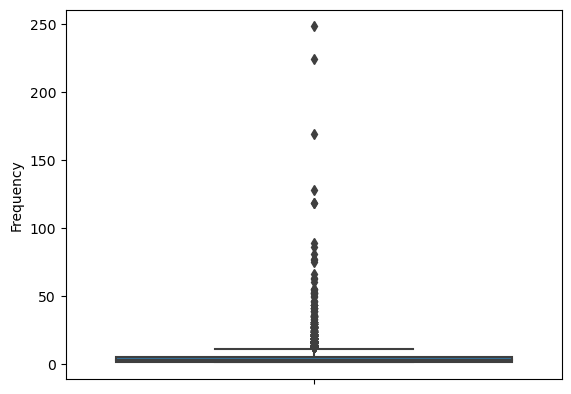

In [91]:
sns.boxplot(y=rfm.Frequency)

In [93]:
# Recency -Outlier Check

In [79]:
Q1, Q3 = np.percentile(rfm.Recency,25), np.percentile(rfm.Recency,75)

In [80]:
Q1, Q3

(20.0, 152.0)

In [81]:
IQR = Q3-Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

In [82]:
rfm[(rfm.Recency<lower) | (rfm.Recency>upper)].shape[0]/rfm.shape[0]

0.0292772186642269

<AxesSubplot:ylabel='Recency'>

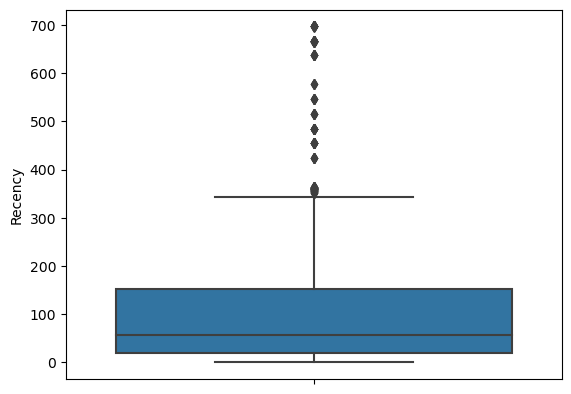

In [92]:
sns.boxplot(y=rfm.Recency)

## Scaling

In [103]:
x = rfm.drop('CustomerID', axis=1)

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()

In [106]:
rfm_scaled = scaler.fit_transform(x)

In [109]:
rfm_scaled= pd.DataFrame(rfm_scaled, columns=['Monetry','Frequency','Recency'])

In [110]:
rfm_scaled

Monetry  Frequency   Recency
0     1.975600  -0.329362 -0.231001
1    -0.535025   0.206102  0.293432
2    -0.219002  -0.115176 -0.012316
3    -0.719372  -0.436455 -0.017146
4     1.843924  -0.436455 -0.190312
...        ...        ...       ...
4367  0.518384  -0.436455 -0.209026
4368 -0.851048  -0.436455 -0.221167
4369 -0.069769  -0.222269 -0.209513
4370 -0.798378   1.169939  0.023900
4371 -0.886162  -0.222269 -0.007444

[4372 rows x 3 columns]

In [111]:
#Building KMeans ---

In [112]:
from sklearn.cluster import KMeans

In [114]:
cluster = range(2,10)

In [115]:
cluster

range(2, 10)

In [119]:
inertia = list()
for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(rfm_scaled)
    inertia.append(km.inertia_)

In [118]:
inertia

[9137.170919692302,
 6001.0056603093235,
 4521.222255406221,
 3493.6794633607865,
 2813.947850740607,
 2180.6847362527856,
 1817.0130606243542,
 1507.796551548162]

In [123]:
import matplotlib.pyplot as plt

In [124]:
sns.lineplot(x=cluster, y= inertia)
plt.grid(True)

In [125]:
km = KMeans(n_clusters=3, n_init=10)

In [126]:
km.fit(rfm_scaled)

KMeans(n_clusters=3)

In [127]:
rfm['cluster']  = km.labels_

In [128]:
rfm

CustomerID  Recency  Frequency  Monetry  cluster
0        12346.0      326          2     0.00        2
1        12347.0       40          7  4310.00        0
2        12348.0       76          4  1797.24        0
3        12349.0       19          1  1757.55        0
4        12350.0      311          1   334.40        2
...          ...      ...        ...      ...      ...
4367     18280.0      160          1   180.60        2
4368     18281.0        4          1    80.82        0
4369     18282.0       93          3   176.60        0
4370     18283.0       10         16  2094.88        0
4371     18287.0        0          3  1837.28        0

[4372 rows x 5 columns]

In [129]:
sns.boxplot(x=rfm.cluster, y=rfm.Monetry)

<AxesSubplot:xlabel='cluster', ylabel='Monetry'>

<AxesSubplot:xlabel='cluster', ylabel='Recency'>

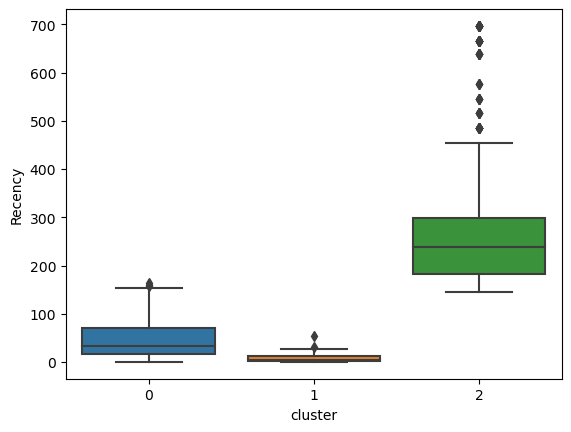

In [130]:
sns.boxplot(x=rfm.cluster, y=rfm.Recency)

In [131]:
sns.boxplot(x=rfm.cluster, y=rfm.Frequency)

<AxesSubplot:xlabel='cluster', ylabel='Frequency'>

In [132]:
from sklearn.metrics import silhouette_score

In [134]:
sil = list()
for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(rfm_scaled)
    sil.append(silhouette_score(rfm_scaled, km.labels_))

In [135]:
sil

[0.8986010713916528,
 0.5477803171091197,
 0.5735604759966907,
 0.5574937184259972,
 0.5658482184701452,
 0.5638665328264024,
 0.47479906297233565,
 0.48469497693652497]

In [136]:
km = KMeans(n_clusters=4, n_init=10)

In [137]:
km.fit(rfm_scaled)

KMeans(n_clusters=4)

In [138]:
rfm['cluster2']  = km.labels_

In [139]:
rfm

CustomerID  Recency  Frequency  Monetry  cluster  cluster2
0        12346.0      326          2     0.00        2         2
1        12347.0       40          7  4310.00        0         0
2        12348.0       76          4  1797.24        0         0
3        12349.0       19          1  1757.55        0         0
4        12350.0      311          1   334.40        2         2
...          ...      ...        ...      ...      ...       ...
4367     18280.0      160          1   180.60        2         2
4368     18281.0        4          1    80.82        0         0
4369     18282.0       93          3   176.60        0         0
4370     18283.0       10         16  2094.88        0         0
4371     18287.0        0          3  1837.28        0         0

[4372 rows x 6 columns]

In [140]:
sns.boxplot(x=rfm.cluster2, y=rfm.Monetry)

<AxesSubplot:xlabel='cluster2', ylabel='Monetry'>

<AxesSubplot:xlabel='cluster', ylabel='Monetry'>

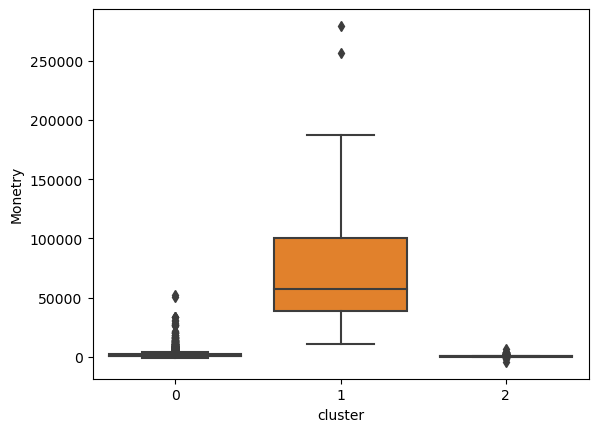

In [141]:
sns.boxplot(x=rfm.cluster, y=rfm.Monetry)